<a href="https://colab.research.google.com/github/adinrw/app_phy_155/blob/master/Tangonan_lab_assignment_module1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AP155 Lab Assignment**
## Module 1: Integrals and Derivatives

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.




### Student Information

_Full Name (Last Name, First Name)_: Tangonan, Darwin James \
_Student No._: 2022-08539\
_Section_: TX3

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: Darwin James Jardinco Tangonan**

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **XX**/100

Score breakdown:
* Problem 1 - XX/30
* Problem 2 - XX/30
* Problem 3 - XX/40

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1
**Integration using the trapezoidal rule and Simpson's rule**

Calculate the integral of the function $ 2x^4 + 3x^2 + 4x + 5$ from $x=0$ to $x=5$.

1. Do the numerical calculation using the trapezoidal rule with 10, 100, and 1,000 slices. Describe each step of the calculation clearly and concisely. *(10 pts.)*

2. What are the percentage errors of your answers in (1)? *(10 pts.)*

3. Repeat the calculation using Simpson's rule with 10, 100, and 1,000 slices. Describe each step of the calculation clearly and concisely. *(5 pts.)*

4. What are the percentage errors of your answers in (3)? How do they compare with the results from (1) for the same number of slices? *(5 pts.)*

In [ ]:
#Define the initial function f(x)
def f(x):
    return 2*x**4 + 3*x**2 + 4*x + 5

#Define the Trapezoidal rule, taking input no. of slices (slice), lower bound (lb) and upper bound (ub)
def Trapezoid(slice, lb, ub):
    # Calculate and the width (h) of each slice
    h = abs(ub - lb) / slice

    # Initialize the sum of the function value, "the part before the sum"
    sum_f = 0.5 * (f(lb) + f(ub))

    # Calculate the sum of the function values at the interior points
    for i in range(1, slice):
        sum_f += f(lb + i * h)

    # Calculate the approximate integral using the trapezoidal rule
    integral = h * sum_f
    return integral

#Declare slices to be tested
slices = [10, 100, 1000]

#Print results from applying trapezoidal rule
print("1. Applying Trapezoidal Rule")
for i in slices:
    print(f"{i}:\t{Trapezoid(i,0,5)}")

#Calculate and Print Percent Error
print("\n2. Calculating percent error, with theoretical of 1450")
for i in slices:
    error = abs(1450 - Trapezoid(i,0,5)) / 1450
    print(f"{i}:\t{error * 100} %")


#Define Simpsons Rule, using same inputs as last time
def Simpsons(slice, lb, ub):
    # Calculate and the width (h) of each slice
    h = abs(ub - lb) / slice

    # Initialize the sum of the function value, "the part before the sum"
    sum_f = f(lb) + f(ub)

    # Calculate the sum of the function values at the interior points
    for i in range(1, slice, 2):        # loop over odd terms
        sum_f += 4 * f(lb + i * h)
    for i in range(2, slice, 2):        #loop over even terms
        sum_f += 2 * f(lb + i * h)

    # Calculate the approximate integral using Simpson's rule
    integral = h * sum_f / 3
    return integral

#Print results from applying Simpson's Rule
print("\n3a. Applying Simpson's Rule")
for i in slices:
    print(f"{i}:\t{Simpsons(i,0,5)}")

#Calculate and Print Percent Error
print("\n3b. Calculating percent error, with theoretical of 1450")
for i in slices:
    error = abs(1450 - Simpsons(i,0,5)) / 1450
    print(f"{i}:\t{error * 100} %")

#Compare Simpsons with Trapezoidal Error
print("\n5. Comparing Simpson's and Trapezoidal Errors\n\tTrapezoidal Error\tSimpsons Error")
for i in slices:
    error_trapezoid = abs(1450 - Trapezoid(i,0,5)) / 1450
    error_simpsons = abs(1450 - Simpsons(i,0,5)) / 1450
    print(f"{i}:\t{error_trapezoid}\t{error_simpsons}")
print("\nAs expected, Simpsons has smaller error than trapezoidal")

1. Applying Trapezoidal Rule
10:	1471.4375
100:	1450.2145812500003
1000:	1450.0021458331234

2. Calculating percent error, with theoretical of 1450
10:	1.478448275862069 %
100:	0.014798706896569988 %
1000:	0.00014798849127240326 %

3a. Applying Simpson's Rule
10:	1450.0833333333333
100:	1450.0000083333337
1000:	1450.000000000834

3b. Calculating percent error, with theoretical of 1450
10:	0.005747126436776382 %
100:	5.747126657485657e-07 %
1000:	5.75176994155707e-11 %

5. Comparing Simpson's and Trapezoidal Errors
	Trapezoidal Error	Simpsons Error
10:	0.01478448275862069	5.7471264367763824e-05
100:	0.00014798706896569988	5.747126657485657e-09
1000:	1.4798849127240327e-06	5.75176994155707e-13

As expected, Simpsons has smaller error than trapezoidal


### PROBLEM 2

**Integration using Gaussian quadrature**

Calculate the integral from Problem 1 using the Gaussian quadrature method: $ 2x^4 + 3x^2 + 4x + 5$ from $x=0$ to $x=5$.

1. Define the function $\tt gaussxw$ from Appendix E of the Newman text (and run the cell). *(10 pts.)*

2. Calculate the integral using the $\tt gaussxw$ function in (1) and number of slices $N = 3$. Describe each step in the calculation clearly and concisely. *(20 pts.)*

In [ ]:
from numpy import ones,copy,cos,tan,pi,linspace

# Import the Gaussxw function from Appendix E of Newman's book
def gaussxw(N):
    # Initial approximation to roots of the Legendre polynomial
    a = linspace(3, 4*N-1, N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta > epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta= max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)
    return x,w

def gauss_quad(N,a,b,f = f):        # Integrate using gaussian quadrature
    x,w = gaussxw(N)                # Get the roots and weights
    xp = 0.5*(b-a)*x + 0.5*(b+a)
    wp = 0.5*(b-a)*w                # Rescale the inputs based on upper and lower bounds

    s = 0                           # Initialize the sum
    for k in range(N):              # Loop through the summation
        s += wp[k]*f(xp[k])
    return s

# Print the results of using Gaussian Quadrature
print("2. Applying Gaussian Quadrature")
print(gauss_quad(3,0,5))


2. Applying Gaussian Quadrature
1450.000000000002


### PROBLEM 3

**Physics Application: Anharmonic Oscillator**

_Refer to Exercise 5.10 of the Newman text._ Consider an anharmonic oscillator with potential $V(x)$ symmetric about $x = 0$. Let us set our anharmonic oscillator going with amplitude $a$. That is, at $t = 0$ we release it from rest at position $x = a$ and it swings back towards the origin. Then at $t = 0$ we have $dx/dt = 0$ and the equation for its total energy becomes $E = V(a)$, i.e., the total energy of the particle is given in terms of the amplitude.

When the particle reaches the origin for the first time, it has gone through one quarter of a period of the oscillator. The period $T$ is given by: $$ T = \sqrt{8m} \int_0^a \frac{dx}{\sqrt{V(a)-V(x)}}. $$

1. Suppose the potential is $V(x) = x^4$ and the mass of the particle is $m = 1$. Write a Python function that calculates the period of the oscillator for given amplitude a using Gaussian quadrature with $N = 20$ points. Describe each step clearly and concisely. *(20 pts.)*

2. Use your function to make a graph of the period for amplitudes ranging from $a = 0$ to $a = 2$. Describe the behavior you find and explain these results clearly and concisely. *(20 pts.)*

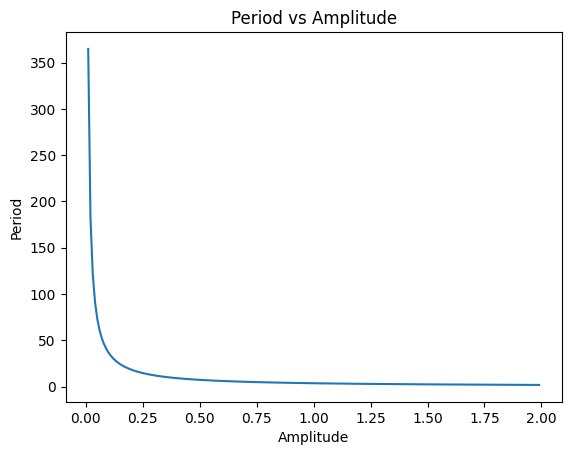

In [ ]:
from math import sqrt

# Anharmonic oscillator potential
def V(x):
    return x**4

# Define the integrand for the period
def I(x, a):
    return 1 / sqrt(V(a) - V(x))

# Integrate the period using Gaussian Quadrature
def period(amp):
    # Create intermediate function of integrand specified at amplitude = amp
    def f(x):
        return I(x, amp)

    # Solve for period
    m = 1
    T = sqrt(8 * m) * gauss_quad(20, 0, amp, f)   # N = 20, lb = 0, ub = amp
    return T

# Plot period for varying amplitudes a = 0 to a = 2
import matplotlib.pyplot as plt

xpoints = [i/100 for i in range(1, 200)]    # Generate a list of values from 0 to 2, with tiny increments
ypoints = [period(i) for i in xpoints]      # Generate corresponding period values
plt.plot(xpoints, ypoints)                  # plot

#Format plot labels and show
plt.xlabel("Amplitude")
plt.ylabel("Period")
plt.title("Period vs Amplitude")
plt.show()